In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [270]:
%matplotlib inline

In [271]:
df=pd.read_csv('understat.com.csv')

In [272]:
df.rename(columns = {'Unnamed: 0':'league', 'Unnamed: 1':'year'}, inplace = True)

In [273]:
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [274]:
#
#
#
# xGA analysis of 2014 on league basis
#
#
#

In [275]:
df_2014=df[df['year']==2014]
df_2014.groupby('league')['xGA'].mean()

league
Bundesliga    44.610000
EPL           48.325222
La_liga       49.759549
Ligue_1       45.136753
RFPL          34.794652
Serie_A       49.078178
Name: xGA, dtype: float64

In [276]:
#
#
#
#analysis of top 4 in 2014
#
#
#

<AxesSubplot:xlabel='position', ylabel='scored'>

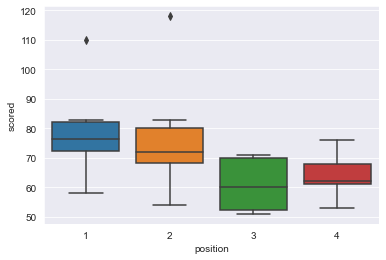

In [277]:
sns.boxplot(x='position',y='scored',data=df[(df['year']==2014)&(df['position']<5)])

In [278]:
#
#
#
#Analysis of winners year 2014
#
#
#

In [279]:
pos1=df[(df['position']==1) & (df['year']==2014)]
pos1.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
120,EPL,2014,1,Chelsea,38,26,9,3,73,32,...,31.524344,-0.475656,29.240835,35.499567,10.942027,13.419520,407,171,75.3172,-11.6828
240,Bundesliga,2014,1,Bayern Munich,34,25,4,5,80,18,...,21.938729,3.938729,20.423172,41.236085,5.761476,25.022717,388,83,73.6116,-5.3884
348,Serie_A,2014,1,Juventus,38,26,9,3,72,24,...,29.129634,5.129634,25.218658,27.006777,8.715008,13.017563,334,152,74.7890,-12.2110
468,Ligue_1,2014,1,Paris Saint Germain,38,24,11,3,83,36,...,28.240364,-7.759636,25.960072,41.818530,7.133794,16.841499,321,116,84.1042,1.1042


<AxesSubplot:xlabel='xGA', ylabel='scored'>

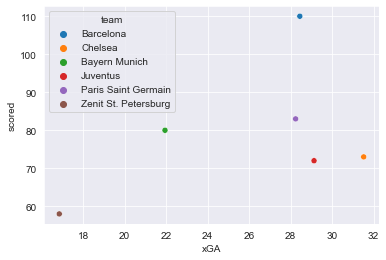

In [280]:
sns.scatterplot(x='xGA',y='scored',data=pos1,hue='team')

<AxesSubplot:xlabel='oppda_coef', ylabel='ppda_coef'>

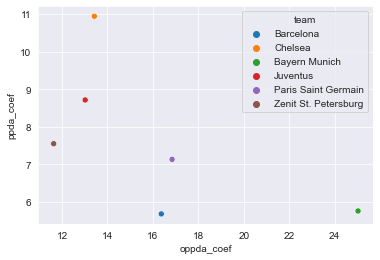

In [281]:
sns.scatterplot(x='oppda_coef',y='ppda_coef',data=pos1,hue='team')

In [282]:
#
#
#
#number of goals scored by teams in each league in each year
#
#
#

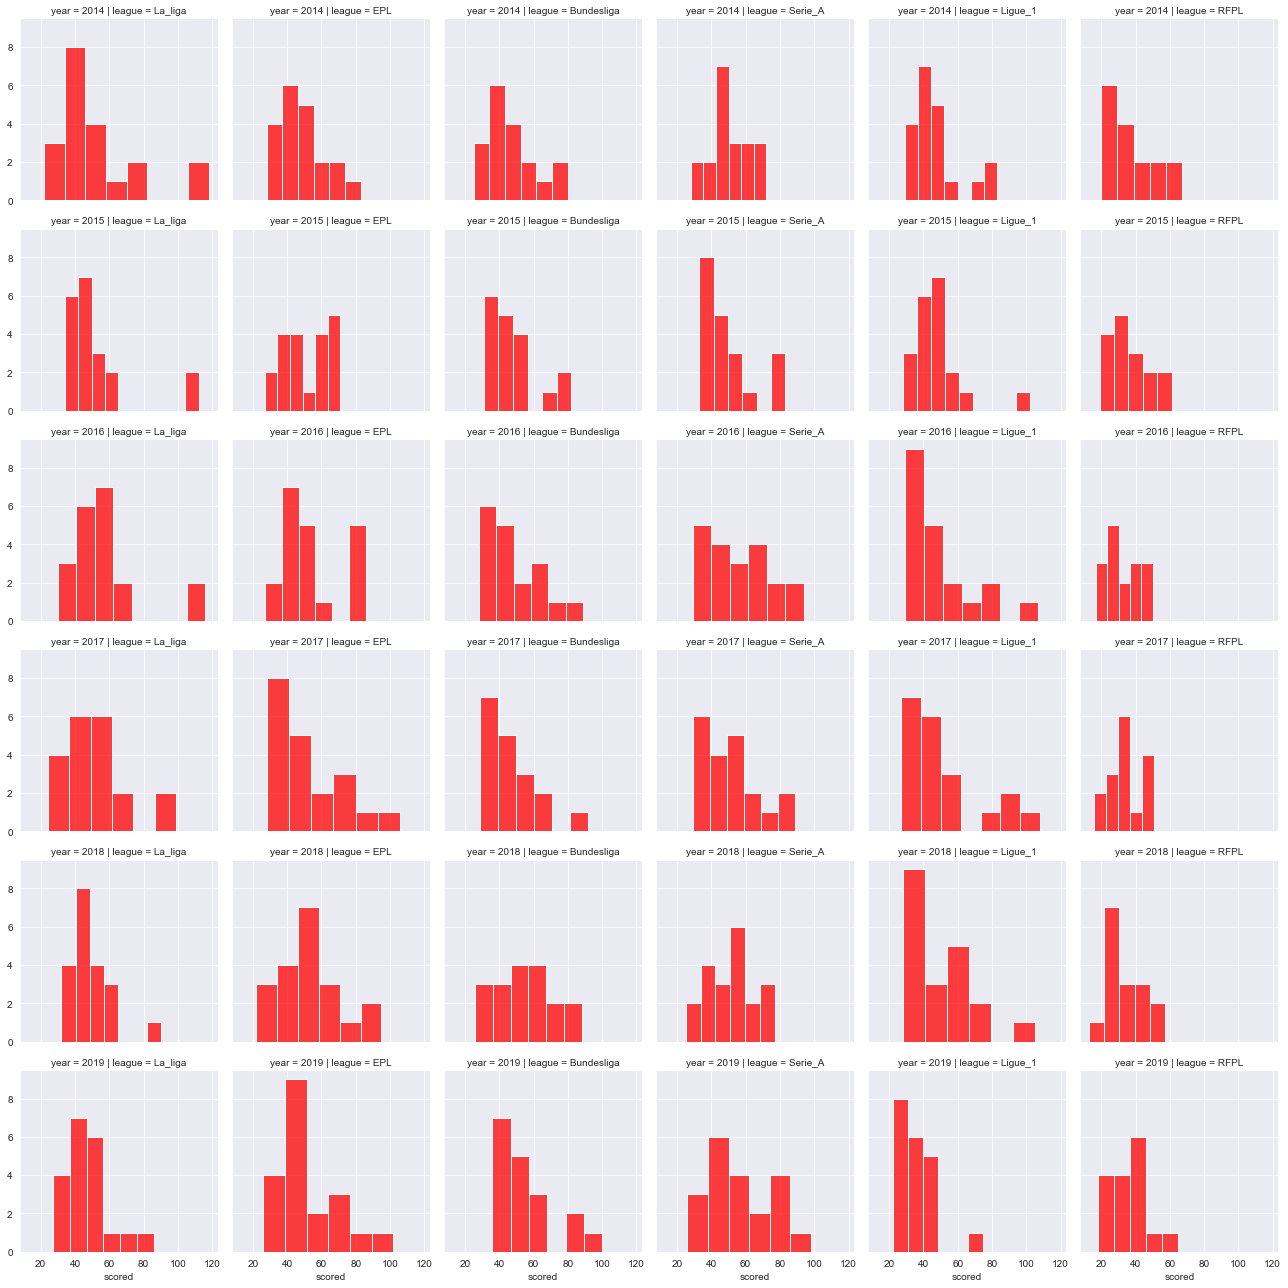

In [283]:
sns.set_style('darkgrid')
g=sns.FacetGrid(data=df,col='league',row='year')
g=g.map(sns.histplot,'scored',color='red')

In [310]:
#
#
#
#model to predict champions league qualification
#
#
#
#

In [285]:
def CLcalc(x):
    if x<5:
        return 1
    else:
        return 0

In [286]:
df['CL']=df['position'].apply(CLcalc)
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,CL
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813,1
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511,1
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647,1
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932,1
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133,0


In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X=df.drop(['league', 'year', 'position', 'team','CL'],axis=1)
y=df['CL']

In [289]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

array([[ 0.64487176,  2.81891184, -1.72374677, ..., -1.73167445,
         3.28738084, -0.01236265],
       [ 0.64487176,  2.81891184, -2.4040946 , ..., -1.01835047,
         2.37719345, -1.4570971 ],
       [ 0.64487176,  1.62775926, -0.02287719, ..., -1.56706122,
         1.74147047, -0.70394027],
       ...,
       [-1.85423468, -0.92471055, -0.70322502, ...,  0.11565175,
        -0.97446362,  0.72242109],
       [-1.85423468, -0.7545459 , -1.72374677, ...,  1.12162147,
        -1.49810699, -0.26964183],
       [-1.85423468, -1.09487521, -1.04339894, ...,  0.11565175,
        -0.76042301,  1.68723199]])

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
rfc=RandomForestClassifier(n_estimators=5)

In [293]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [294]:
predict=rfc.predict(X_test)

In [295]:
from sklearn.metrics import classification_report,confusion_matrix

In [296]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       134
           1       0.81      0.92      0.86        37

    accuracy                           0.94       171
   macro avg       0.89      0.93      0.91       171
weighted avg       0.94      0.94      0.94       171



In [297]:
print(confusion_matrix(y_test,predict))

[[126   8]
 [  3  34]]


In [298]:
#
#
#
#average goals scored per year in each league by a team
#
#
#

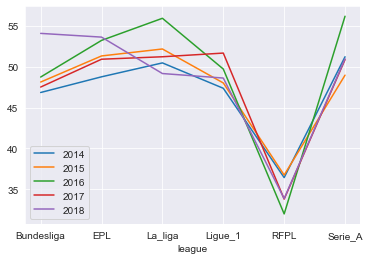

In [299]:
df[df['year']==2014].groupby('league')['scored'].mean().plot()
df[df['year']==2015].groupby('league')['scored'].mean().plot()
df[df['year']==2016].groupby('league')['scored'].mean().plot()
df[df['year']==2017].groupby('league')['scored'].mean().plot()
df[df['year']==2018].groupby('league')['scored'].mean().plot()
plt.legend([2014,2015,2016,2017,2018])

In [300]:
#
#
#grouping of the top 4 from leagues based on features
#
#
#

In [301]:
from sklearn.decomposition import PCA

In [302]:
df2=df[df['position']<5]

In [303]:
X1=df2.drop(['league', 'year', 'position', 'team','CL'],axis=1)

In [304]:
scaler1=StandardScaler()

In [305]:
X1=scaler1.fit_transform(X1)

In [306]:
pca=PCA(n_components=2)

In [307]:
pca_x=pca.fit_transform(X1)

In [308]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

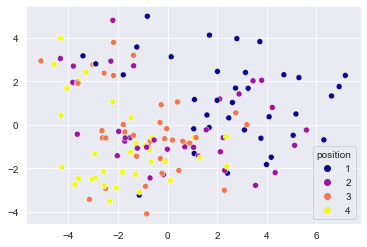

In [309]:
sns.scatterplot(x=pca_x[:,0],y=pca_x[:,1],hue=df2['position'],palette='plasma')